# Classifier for recognize handwritten digits 

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

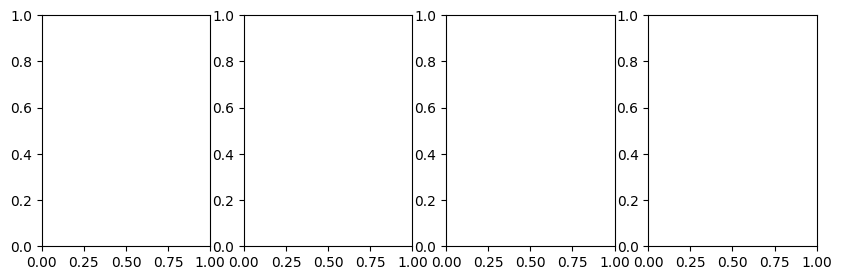

In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

digtis = load_digits()

fig, axes = plt.subplots(1, 4, figsize = (10, 3))

# for ax, image, label in zip(axes, digtis.images, digtis.target):
#     ax.set_axis_off()
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
#     ax.set_title(f"Label{label}")

digtis.images


In [ ]:
"""
Vad den gör är att jämnföra varje pixel. Från en vector däe vi plattat till bilden

Om vi har hög "precision" så har vi mindra falska rätt. 

Med få klasser så är KNN riktigt bra. Detta för att om vi ökar dimnsionerna så blir euclidiska avståndet för långt. 
Detta gäller generellt att om vi går upp i dimansioner så blir avstånden längre. 
"""

X_digits, Y_digits = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X_digits, Y_digits, test_size=0.5, random_state=42)

knn = KNeighborsClassifier(n_neighbors=1)
log = LogisticRegression(max_iter=1000)

knn.fit(X_train, y_train)
log.fit(X_train, y_train)

y_knn = knn.predict(X_test)
y_log = log.predict(X_test)

print(classification_report(y_test, y_knn))
print(classification_report(y_test, y_log))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       0.96      1.00      0.98        89
           2       1.00      0.99      0.99        83
           3       0.98      0.97      0.97        93
           4       0.99      0.99      0.99        93
           5       1.00      0.98      0.99        99
           6       1.00      1.00      1.00        98
           7       0.98      0.99      0.98        87
           8       0.96      0.96      0.96        83
           9       0.97      0.96      0.96        92

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899



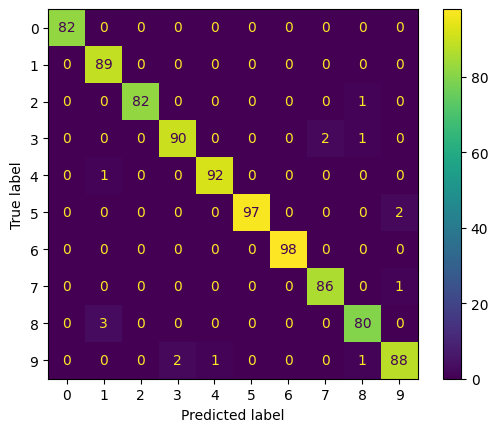

In [9]:
cm = confusion_matrix(y_test, y_knn)
ConfusionMatrixDisplay(cm).plot()

[Text(0.5, 1.0, 'Elbow plot'), Text(0.5, 0, 'k'), Text(0, 0.5, 'Error')]

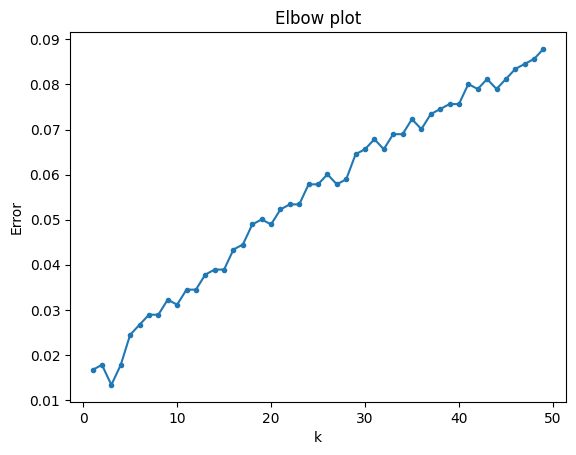

In [10]:
"""
Hyper parameter optimering
"""

error = accuracy_score(y_test, y_knn)
error_list = list()

for k in range(1,50):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(X_train, y_train)
    y_hat = model_KNN.predict(X_test)
    error_list += [1-accuracy_score(y_test, y_hat)]


fig, ax = plt.figure(), plt.axes()

ax.plot(range(1, len(error_list)+1), error_list, ".-")
ax.set(title="Elbow plot", xlabel="k", ylabel="Error")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       0.99      1.00      0.99        89
           2       0.99      1.00      0.99        83
           3       0.99      0.96      0.97        93
           4       0.99      1.00      0.99        93
           5       0.99      0.98      0.98        99
           6       1.00      1.00      1.00        98
           7       0.97      1.00      0.98        87
           8       0.98      0.98      0.98        83
           9       0.98      0.96      0.97        92

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899



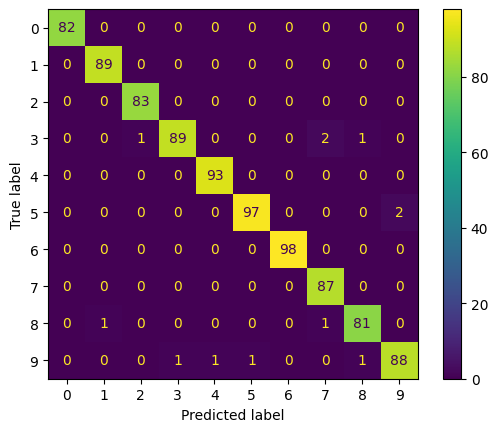

In [11]:
"""
KNN funkar bäst på siffor, men bokstäver så får den problem
"""

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)
print(classification_report(y_test, y_knn))
cm = confusion_matrix(y_test, y_knn)
ConfusionMatrixDisplay(cm).plot()